# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [155]:
#📥 Import et configuration
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os
import json

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [156]:
# ### 💡 Première requête guidée
load_dotenv() # charge les clés de .env dans les variables d'environnement
API_KEY = os.getenv("OPENWEATHER_API_KEY")
BASE_URL = "https://api.openweathermap.org/data/2.5"

def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    try:
        response = r.get(url, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}\nStatus code: {r.status_codes}")
    except r.Exception.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 
    # Votre code ici pour l'appel API
    # Gérez les erreurs HTTP !
get_weather_data("Montpellier",API_KEY)
 # Remplacez par votre implémentation

{'coord': {'lon': 3.8772, 'lat': 43.6109},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'ciel dégagé',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 24.16,
  'feels_like': 23.78,
  'temp_min': 24.16,
  'temp_max': 25.71,
  'pressure': 1014,
  'humidity': 44,
  'sea_level': 1014,
  'grnd_level': 1005},
 'visibility': 10000,
 'wind': {'speed': 8.23, 'deg': 340},
 'clouds': {'all': 0},
 'dt': 1753697297,
 'sys': {'type': 2,
  'id': 2038454,
  'country': 'FR',
  'sunrise': 1753676962,
  'sunset': 1753729942},
 'timezone': 7200,
 'id': 2992166,
 'name': 'Montpellier',
 'cod': 200}

In [157]:
# Configuration API
API_KEY = os.getenv("OPENWEATHER_API_KEY")  # Remplacez par votre vraie clé
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

get_weather_data(CITIES[4], API_KEY)

{'coord': {'lon': 4.8897, 'lat': 52.374},
 'weather': [{'id': 520,
   'main': 'Rain',
   'description': 'petites averses',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 18,
  'feels_like': 17.61,
  'temp_min': 17.14,
  'temp_max': 20,
  'pressure': 1017,
  'humidity': 67,
  'sea_level': 1017,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 330},
 'rain': {'1h': 0.41},
 'clouds': {'all': 75},
 'dt': 1753697179,
 'sys': {'type': 2,
  'id': 2012552,
  'country': 'NL',
  'sunrise': 1753674875,
  'sunset': 1753731544},
 'timezone': 7200,
 'id': 2759794,
 'name': 'Amsterdam',
 'cod': 200}

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

1. Erreur 401 Unauthorized — API-clé:
    absent, incorrect, révoquée par website
2. Erreur 404 Not Found — Ville :
    Introuvable, mal orthographiée ou non disponible dans l’API.

**Comment gérer?**
    
     try:
        response = r.get(url, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    return None

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [ ]:
# Configuration Visual Crossing
load_dotenv() # charge les clés de .env dans les variables d'environnement
VC_API_KEY = os.getenv("VISUAL_CROSSING_APIS")
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed',
        'unitGroup': 'metric' #Celsius
    }

    # Votre implémentation ici
    # Pensez à la gestion d'erreurs !
    try:
        response = r.get(url, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception

        data = response.json()
        return data
    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    except r.exceptions.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 

all_df_data = []

for city in CITIES:
    data = get_historical_weather(city, "2024-07-01", "2024-07-30", VC_API_KEY)
    if data:
        df_data_days = data['days']
        df_data = pd.DataFrame(df_data_days)[["datetime", "temp", "humidity", "precip", "windspeed"]]
        df_data.rename(columns={
            "datetime": "date",
            "temp": "temperature",
            "humidity": "humidite",
            "precip": "precipitation",
            "windspeed": "vent"
        }, inplace=True)

        df_data.insert(1, "ville", city)
        all_df_data.append(df_data)

df_final = pd.concat(all_df_data, ignore_index=False)
df_final = df_final.sort_values(by=["date", "ville"]).reset_index(drop=True)

# df_final #Je ne l’ai pas affiché parce qu’il y avait trop de code HTML, et ce n’était pas lisible.

Http Error: 400 Client Error:  for url: https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/Rome/2024-07-01/2024-07-30?key=JYJNPLJS5F7GPQQJUSGK2AH6D&include=days&elements=datetime%2Ctemp%2Chumidity%2Cprecip%2Cwindspeed&unitGroup=metric


,date,ville,temperature,humidite,precipitation,vent
0,2024-07-01,Amsterdam,15.8,75.4,0.203,24.6
1,2024-07-01,Berlin,17.5,84.5,5.597,16.5
2,2024-07-01,Madrid,23.3,49.1,0.000,17.9
3,2024-07-01,Paris,18.1,66.3,0.162,16.4
4,2024-07-01,Vienna,22.7,63.8,0.102,25.2
...,...,...,...,...,...,...
145,2024-07-30,Amsterdam,22.6,65.8,0.000,13.5
146,2024-07-30,Berlin,20.1,62.4,0.000,10.2
147,2024-07-30,Madrid,30.8,32.3,0.261,23.0
148,2024-07-30,Paris,28.1,58.5,0.000,9.2


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [159]:
### 🗺️ Obtenir les coordonnées
def get_city_coordinates(city, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupérez lat/lon pour chaque ville
    """
    BASE_URL = "http://api.openweathermap.org/geo/1.0/direct"
    params = {
        'q': city,
        'limit': 1,
        'appid': api_key
    }

    try:
        response = r.get(BASE_URL, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception
        data = response.json()

        if data:
            lat = data[0]['lat']
            lon = data[0]['lon']
            return lat, lon
        else:
            print(f"Aucune coordonnée trouvée pour: {city}")
            return None, None
    except Exception as i:
        print(f"Erreur lors de la récupération des coordonnées: {i}")
        return None, None

all_coords = {}

for city in CITIES:
    lat, lon = get_city_coordinates(city, API_KEY)
    if lat is not None and lon is not None:
        all_coords[city] = (lat, lon)
    else:
         print(f"Impossible d'obtenir les coordonnées pour la ville: {city}")
print(all_coords)

{'Paris': (48.8588897, 2.3200410217200766), 'Berlin': (52.5170365, 13.3888599), 'Madrid': (40.4167047, -3.7035825), 'Rome': (41.8933203, 12.4829321), 'Amsterdam': (52.3727598, 4.8936041), 'Vienna': (48.2083537, 16.3725042)}


In [ ]:
# ## Partie 3 : API supplémentaire - Qualité de l'air

# ### 🌬️ API OpenWeatherMap Air Pollution
def get_air_quality(lat, lon, api_key):
    """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """

    BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution"
    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key
    }

    try:
        response = r.get(BASE_URL, params=params)
        response.raise_for_status() # Vérifie si status code est 200, sinon lève une exception
        data = response.json()

        #Extraction des données importantes
        aqi = data['list'][0]['main']['aqi']
        components = data['list'][0]['components']

        return {
            "aqi": aqi,
            **components
        }

    except r.HTTPError as http_err:
        print(f"Http Error: {http_err}")
    except r.exceptions.ConnectionError as cn_error:
        print(f"Error: {cn_error}")
    return None 

air_qual_data = []

def get_air_quality2(CITIES, df_final, api_key):
    for city in CITIES:
        lat, lon = get_city_coordinates(city, api_key)
        if lat is not None and lon is not None:
            qual = get_air_quality(lat, lon, api_key)
            if qual:
                # Ajouter la ville et la qualité de l'air à la liste
                qual['ville'] = city
                air_qual_data.append(qual)

                air_qual_df = pd.DataFrame(air_qual_data)

                if df_final is not None:
                    # Nous combinons avec les données météorologiques de la colonne « ville ».
                    combined_df = pd.merge(df_final, air_qual_df, on='ville', how='left')
                    return combined_df

            return air_qual_df
df_with_air_qual = get_air_quality2(CITIES, df_final, API_KEY)
# df_with_air_qual #Je ne l’ai pas affiché parce qu’il y avait trop de code, et ce n’était pas lisible.


## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

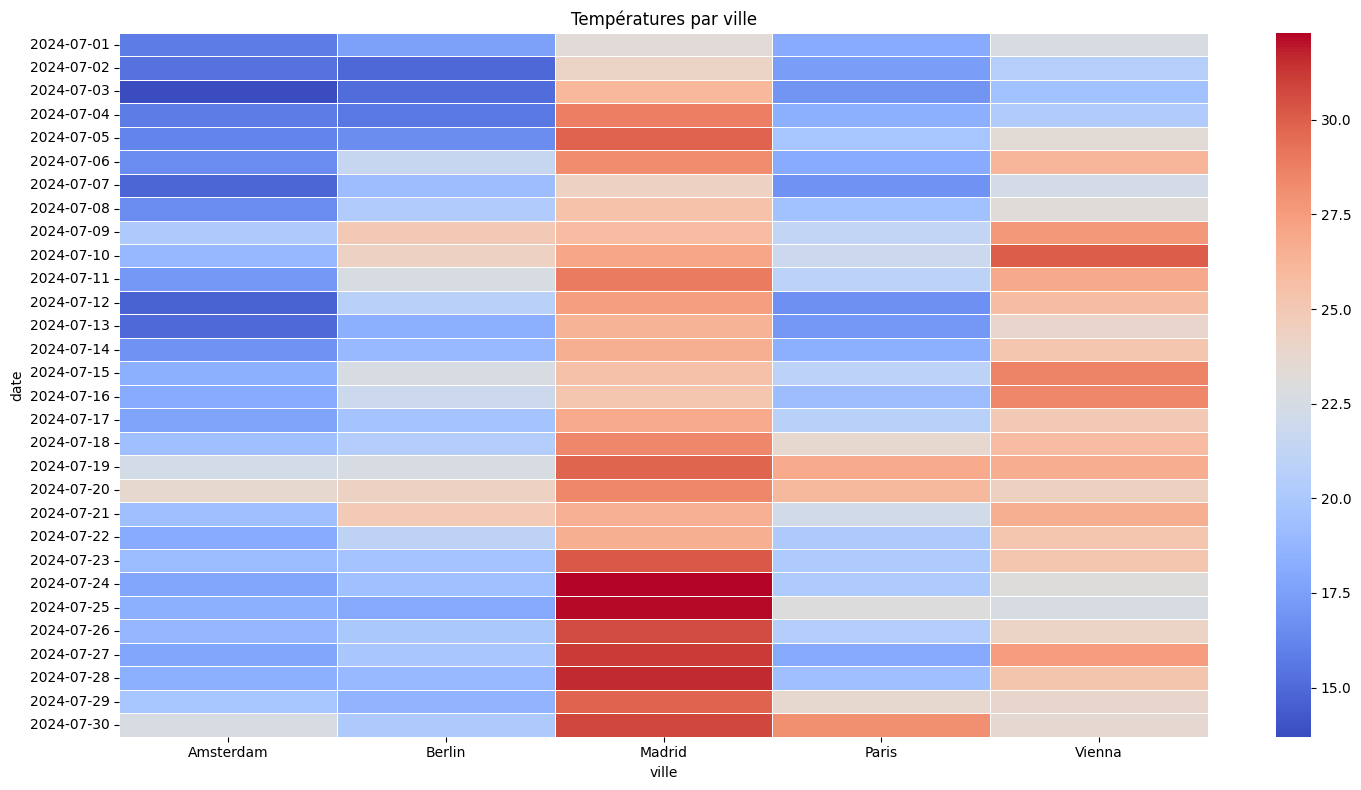

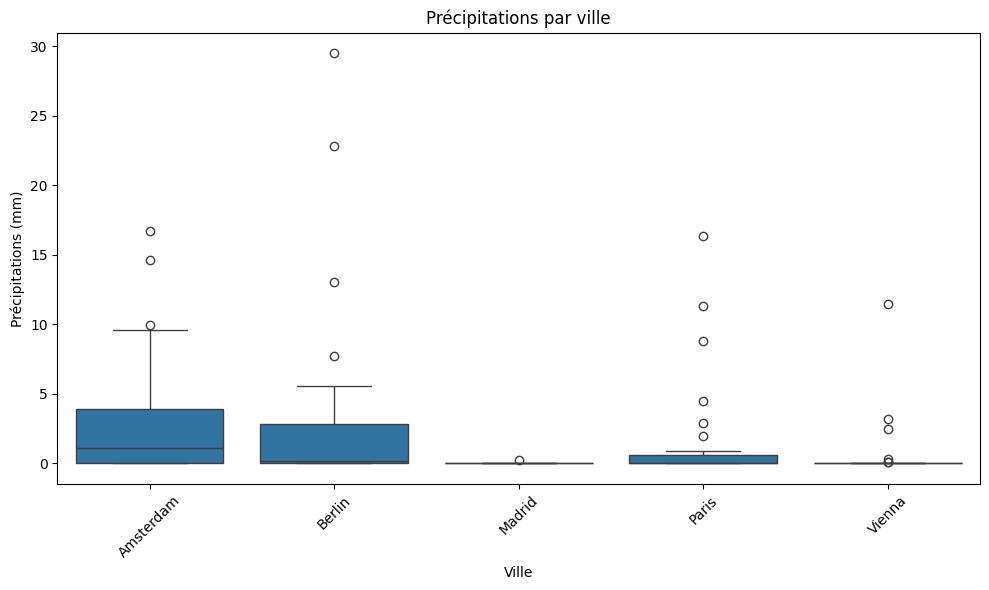

In [165]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))

# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot_temp = df_final.pivot_table(index='date', columns='ville', values='temperature')
sns.heatmap(pivot_temp, cmap='coolwarm', linewidths=0.5)
plt.title("Températures par ville")
plt.xlabel("ville")
plt.ylabel("date")
plt.tight_layout()
plt.show()
# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='ville', y='precipitation')
plt.title("Précipitations par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitations (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()
# sns.regplot()


## Partie 5 : API bonus - Données agricoles

### �� API AgroMonitoring (gratuite)

In [162]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [163]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites